# 01.01 - PROYECTO KAGGLE

*Alvaro Varelas*

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 94% 19.0M/20.1M [00:00<00:00, 63.1MB/s]
100% 20.1M/20.1M [00:00<00:00, 56.4MB/s]


## unzip and inspect data

In [3]:
!unzip udea*.zip > /dev/null

In [4]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## load `train.csv` data with pandas



In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
from local.lib import mlutils
%matplotlib inline


z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


In [6]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


### Exploracion de datos


In [7]:
# informacion de los tipos de datos del dataset
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

In [8]:
# mostramos los primeros y los ultimos 5 datos de cada columna
print(z,5)

            ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
0       904256    20212                           ENFERMERIA   
1       645256    20212                              DERECHO   
2       308367    20203                MERCADEO Y PUBLICIDAD   
3       470353    20195           ADMINISTRACION DE EMPRESAS   
4       989032    20212                           PSICOLOGIA   
...        ...      ...                                  ...   
692495   25096    20195                             BIOLOGIA   
692496  754213    20212                           PSICOLOGIA   
692497  504185    20183  ADMINISTRACIÓN EN SALUD OCUPACIONAL   
692498  986620    20195                           PSICOLOGIA   
692499  933374    20195                           PSICOLOGIA   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                      BOGOTÁ  Entre 5.5 millones y menos de 7 millones   
1                   ATLANTICO  Entre 2.5 millones y menos de 4 millones   
2     

In [9]:
# hacemos una estadistica descriptiva de los datos (solo lo hace con var num)
z.describe()

,ID,PERIODO
count,692500.000000,692500.000000
mean,494606.130576,20198.366679
std,285585.209455,10.535037
min,1.000000,20183.000000
25%,247324.750000,20195.000000
50%,494564.500000,20195.000000
75%,741782.500000,20203.000000
max,989286.000000,20213.000000


In [10]:
# chequeamos cuantos valores nulos hay en el dataset
z.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


In [11]:
k = z.isna().sum()
k[k!=0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664
ESTU_PAGOMATRICULAPROPIO,6498


In [12]:
# miramos cuantas columnas, filas, caracteristicas, valores unicos y valores faltantes hay
print ("Rows     : " ,z.shape[0])
print ("Columns  : " ,z.shape[1])
print ("\nFeatures : \n" ,z.columns.tolist())
print ("\nUnique values :  \n",z.nunique())
print ("\nMissing values :  ", z.isnull().sum().values.sum())

Rows     :  692500
Columns  :  12

Features : 
 ['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']

Unique values :  
 ID                                692500
PERIODO                                9
ESTU_PRGM_ACADEMICO                  948
ESTU_PRGM_DEPARTAMENTO                31
ESTU_VALORMATRICULAUNIVERSIDAD         8
ESTU_HORASSEMANATRABAJA                5
FAMI_ESTRATOVIVIENDA                   7
FAMI_TIENEINTERNET                     2
FAMI_EDUCACIONPADRE                   12
FAMI_EDUCACIONMADRE                   12
ESTU_PAGOMATRICULAPROPIO               2
RENDIMIENTO_GLOBAL                     4
dtype: int64

Missing values :   149250


In [13]:
z.tail(60)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
692440,237810,20203,FINANZAS,ANTIOQUIA,Más de 7 millones,0,Estrato 6,Si,Educación profesional completa,Educación profesional completa,No,medio-alto
692441,746267,20212,NEGOCIOS INTERNACIONALES,SANTANDER,Entre 4 millones y menos de 5.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Educación profesional incompleta,Secundaria (Bachillerato) completa,Si,medio-bajo
692442,223826,20212,CIENCIAS NAVALES PARA OFICIALES NAVALES,BOLIVAR,Entre 4 millones y menos de 5.5 millones,0,Estrato 2,Si,Educación profesional incompleta,Educación profesional incompleta,Si,medio-alto
692443,926503,20203,CONTADURIA PUBLICA,VALLE,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,No,Secundaria (Bachillerato) completa,Educación profesional completa,Si,alto
692444,763147,20183,OPTOMETRIA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,NaN,NaN,NaN,Primaria completa,Secundaria (Bachillerato) incompleta,No,bajo
692445,340073,20212,INGENIERIA AMBIENTAL,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 2,Si,Ninguno,Ninguno,Si,bajo
692446,159035,20183,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Primaria completa,Primaria completa,Si,bajo
692447,642586,20183,GESTION Y DESARROLLO URBANOS,BOGOTÁ,Más de 7 millones,Más de 30 horas,Estrato 5,Si,Educación profesional completa,Educación profesional completa,No,medio-alto
692448,54207,20183,PSICOLOGIA,TOLIMA,Entre 1 millón y menos de 2.5 millones,NaN,NaN,NaN,NaN,NaN,No,bajo
692449,112534,20183,ADMINISTRACIÓN DE EMPRESAS,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Si,medio-bajo


**Reparacion de dataset**

In [149]:
#PHacemos copia de Dataframe
df = z.copy()

# 1 Reparamos los datos faltantes

In [150]:
# Usaremos la función apply() para aplicar la función lambda al dataframe para reaparar los datos faltantes
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.value_counts().index[0]))

In [151]:
df.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,0
FAMI_EDUCACIONMADRE,0


In [152]:
# Examinamos las últimas 60 muestras
df.tail(60)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
692440,237810,20203,FINANZAS,ANTIOQUIA,Más de 7 millones,0,Estrato 6,Si,Educación profesional completa,Educación profesional completa,No,medio-alto
692441,746267,20212,NEGOCIOS INTERNACIONALES,SANTANDER,Entre 4 millones y menos de 5.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Educación profesional incompleta,Secundaria (Bachillerato) completa,Si,medio-bajo
692442,223826,20212,CIENCIAS NAVALES PARA OFICIALES NAVALES,BOLIVAR,Entre 4 millones y menos de 5.5 millones,0,Estrato 2,Si,Educación profesional incompleta,Educación profesional incompleta,Si,medio-alto
692443,926503,20203,CONTADURIA PUBLICA,VALLE,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,No,Secundaria (Bachillerato) completa,Educación profesional completa,Si,alto
692444,763147,20183,OPTOMETRIA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Más de 30 horas,Estrato 2,Si,Primaria completa,Secundaria (Bachillerato) incompleta,No,bajo
692445,340073,20212,INGENIERIA AMBIENTAL,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 2,Si,Ninguno,Ninguno,Si,bajo
692446,159035,20183,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Primaria completa,Primaria completa,Si,bajo
692447,642586,20183,GESTION Y DESARROLLO URBANOS,BOGOTÁ,Más de 7 millones,Más de 30 horas,Estrato 5,Si,Educación profesional completa,Educación profesional completa,No,medio-alto
692448,54207,20183,PSICOLOGIA,TOLIMA,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
692449,112534,20183,ADMINISTRACIÓN DE EMPRESAS,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Si,medio-bajo


In [153]:
# Hacemos un resumen del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  692500 non-null  object
 5   ESTU_HORASSEMANATRABAJA         692500 non-null  object
 6   FAMI_ESTRATOVIVIENDA            692500 non-null  object
 7   FAMI_TIENEINTERNET              692500 non-null  object
 8   FAMI_EDUCACIONPADRE             692500 non-null  object
 9   FAMI_EDUCACIONMADRE             692500 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        692500 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

# 2 Cambiamos los nombres de las caracteristicas

In [154]:
# Mostramos el nombre de las columnas
df.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [155]:
# Cambiamos el nombre a las caacteristicas del dataframe
df.rename(columns={'ID':'id', 'PERIODO':'periodo', 'ESTU_PRGM_ACADEMICO':'estPrgAcademico', 'ESTU_PRGM_DEPARTAMENTO':'estPrgDep',
       'ESTU_VALORMATRICULAUNIVERSIDAD':'estVlrMatrUniv', 'ESTU_HORASSEMANATRABAJA':'estHrsTrabSem',
       'FAMI_ESTRATOVIVIENDA':'fliaEstrVivienda', 'FAMI_TIENEINTERNET':'fliaInternet', 'FAMI_EDUCACIONPADRE':'fliaEducPadre',
       'FAMI_EDUCACIONMADRE':'fliaEducMadre', 'ESTU_PAGOMATRICULAPROPIO':'estPagoMatricula',
       'RENDIMIENTO_GLOBAL':'rendimGlobal'}, inplace=True)
df

,id,periodo,estPrgAcademico,estPrgDep,estVlrMatrUniv,estHrsTrabSem,fliaEstrVivienda,fliaInternet,fliaEducPadre,fliaEducMadre,estPagoMatricula,rendimGlobal
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


# 3 Organizamos el dataset

In [156]:
# Nos aseguramos que este ordenado por el índice por ID
df.sort_index(inplace=True)
df

,id,periodo,estPrgAcademico,estPrgDep,estVlrMatrUniv,estHrsTrabSem,fliaEstrVivienda,fliaInternet,fliaEducPadre,fliaEducMadre,estPagoMatricula,rendimGlobal
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


# 4 inspeccionamos la variable de salida

<Axes: xlabel='rendimGlobal'>

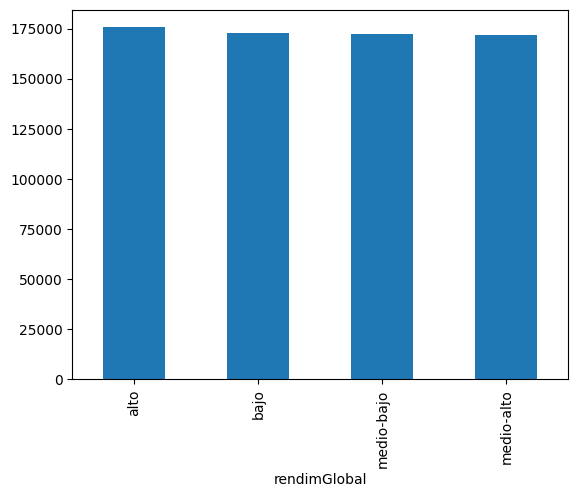

In [157]:
# Graficamos la variable de salida que es categorica
df['rendimGlobal'].value_counts().plot(kind='bar')

# 5 Examinamos los datos numericos

In [158]:
df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
id,692500.0,494606.130576,285585.209455,1.0,247324.75,494564.5,741782.5,989286.0
periodo,692500.0,20198.366679,10.535037,20183.0,20195.00,20195.0,20203.0,20213.0


# 6 One hot encoding para las categoricas con dos valores unicos

In [159]:
df['fliaInternet'].value_counts(0)

,count
fliaInternet,
Si,619143
No,73357


In [160]:
# Ahora convertimos 'Si' en 1 y 'No' en 0
df['fliaInternet'] = df['fliaInternet'].apply(lambda x: 1 if x == 'Si' else 0)
df['fliaInternet'].value_counts(0)

,count
fliaInternet,
1,619143
0,73357


In [161]:
df['estPagoMatricula'].value_counts(0)

,count
estPagoMatricula,
No,388699
Si,303801


In [162]:
# Hacemos lo mismo para la columna pago matricula
df['estPagoMatricula'] = df['estPagoMatricula'].apply(lambda x: 1 if x == 'Si' else 0)
df['estPagoMatricula'].value_counts(0)

,count
estPagoMatricula,
0,388699
1,303801


# 7 One hot encoding para las otrascolumnas con variables categoricas

In [163]:
# Making dummy variables for categorical data with more inputs and we convert them to integer values.

df = pd.get_dummies(df, columns=[ 'estVlrMatrUniv', 'estHrsTrabSem', 'estPrgDep', 'fliaEstrVivienda', 'fliaEducPadre', 'fliaEducMadre'], dtype=int)
df.head()


,id,periodo,estPrgAcademico,fliaInternet,estPagoMatricula,rendimGlobal,estVlrMatrUniv_Entre 1 millón y menos de 2.5 millones,estVlrMatrUniv_Entre 2.5 millones y menos de 4 millones,estVlrMatrUniv_Entre 4 millones y menos de 5.5 millones,estVlrMatrUniv_Entre 5.5 millones y menos de 7 millones,...,fliaEducMadre_Ninguno,fliaEducMadre_No Aplica,fliaEducMadre_No sabe,fliaEducMadre_Postgrado,fliaEducMadre_Primaria completa,fliaEducMadre_Primaria incompleta,fliaEducMadre_Secundaria (Bachillerato) completa,fliaEducMadre_Secundaria (Bachillerato) incompleta,fliaEducMadre_Técnica o tecnológica completa,fliaEducMadre_Técnica o tecnológica incompleta
0,904256,20212,ENFERMERIA,1,0,medio-alto,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,645256,20212,DERECHO,0,0,bajo,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,308367,20203,MERCADEO Y PUBLICIDAD,1,0,bajo,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,1,0,alto,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,989032,20212,PSICOLOGIA,1,0,medio-bajo,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Rango de valores de las columnas valor matricula y horas semanales

In [164]:
# Valores unicos
valores_unicos = df['estPrgAcademico'].unique()
print(valores_unicos)

['ENFERMERIA' 'DERECHO' 'MERCADEO Y PUBLICIDAD'
 'ADMINISTRACION DE EMPRESAS' 'PSICOLOGIA' 'MEDICINA VETERINARIA'
 'INGENIERIA MECANICA' 'ADMINISTRACIÓN EN SALUD OCUPACIONAL'
 'INGENIERIA INDUSTRIAL' 'ADMINISTRACIÓN FINANCIERA' 'HOTELERIA Y TURISMO'
 'LICENCIATURA EN CIENCIAS SOCIALES' 'LICENCIATURA EN PEDAGOGIA INFANTIL'
 'COMUNICACION SOCIAL' 'CIENCIA POLITICA'
 'PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL'
 'MAESTRO EN MÚSICA' 'INGENIERIA MECATRONICA' 'TRABAJO SOCIAL'
 'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL' 'INGENIERIA CIVIL'
 'CONTADURIA PÚBLICA' 'ADMINISTRACION EN SALUD'
 'ADMINISTRACIÓN DE EMPRESAS' 'ESTADISTICA' 'LICENCIATURA EN BIOLOGIA'
 'INGENIERIA AGROINDUSTRIAL' 'ZOOTECNIA' 'COMUNICACION AUDIOVISUAL'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES'
 'COMUNICACION SOCIAL  - PERIODISMO' 'SEGURIDAD Y SALUD EN EL TRABAJO'
 'MEDICINA' 'ADMINISTRACION DE LA SEGURIDAD SOCIAL' 'CONTADURIA PUBLICA'
 'ODONTOLOGIA' 'DISEÑO INDUSTRIAL' 'ECON

# Hacemos el encoding para la variable objetivo y la columna estPrgAcademico

In [165]:
from sklearn.preprocessing import OneHotEncoder

def group_programs(program):
    if 'INGENIERÍA' in program:
        return 'Ingeniería'
    elif 'CIENCIAS' in program:
        return 'Ciencias'
    elif 'HUMANIDADES' in program:
        return 'Humanidades'
    else:
        return 'Otros'

def encode_rendim(rendim):
    mapping = {'bajo': 1, 'medio-bajo': 2, 'medio-alto': 3, 'alto': 4}
    return mapping[rendim]


df['area_academica'] = df['estPrgAcademico'].apply(group_programs)
df['rendimGlobal_num'] = df['rendimGlobal'].apply(encode_rendim)

# One-hot encoding para 'area_academica'
encoder = OneHotEncoder()
onehot_encoded = encoder.fit_transform(df[['area_academica']])
df_onehot = pd.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out())

# Concatenamos el DataFrame original con el codificado
df = pd.concat([df, df_onehot], axis=1)

# Eliminamos la columna original 'estPrgAcademico'
df = df.drop('estPrgAcademico', axis=1)

# Eliminamos la columna original 'rendimGlobal' y 'area_academica'
df = df.drop(['rendimGlobal', 'area_academica'], axis=1)


In [166]:
df

,id,periodo,fliaInternet,estPagoMatricula,estVlrMatrUniv_Entre 1 millón y menos de 2.5 millones,estVlrMatrUniv_Entre 2.5 millones y menos de 4 millones,estVlrMatrUniv_Entre 4 millones y menos de 5.5 millones,estVlrMatrUniv_Entre 5.5 millones y menos de 7 millones,estVlrMatrUniv_Entre 500 mil y menos de 1 millón,estVlrMatrUniv_Menos de 500 mil,...,fliaEducMadre_Primaria incompleta,fliaEducMadre_Secundaria (Bachillerato) completa,fliaEducMadre_Secundaria (Bachillerato) incompleta,fliaEducMadre_Técnica o tecnológica completa,fliaEducMadre_Técnica o tecnológica incompleta,rendimGlobal_num,area_academica_Ciencias,area_academica_Humanidades,area_academica_Ingeniería,area_academica_Otros
0,904256,20212,1,0,0,0,0,1,0,0,...,0,0,0,0,0,3,0.0,0.0,0.0,1.0
1,645256,20212,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0.0,0.0,0.0,1.0
2,308367,20203,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.0,0.0,0.0,1.0
3,470353,20195,1,0,0,0,1,0,0,0,...,0,1,0,0,0,4,0.0,0.0,0.0,1.0
4,989032,20212,1,0,0,1,0,0,0,0,...,0,0,0,0,0,2,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,1,1,0,0,0,0,1,0,...,0,0,1,0,0,3,0.0,0.0,0.0,1.0
692496,754213,20212,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0.0,0.0,0.0,1.0
692497,504185,20183,1,1,1,0,0,0,0,0,...,0,0,1,0,0,2,0.0,0.0,0.0,1.0
692498,986620,20195,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0.0,0.0,0.0,1.0


In [167]:
# Ahora mostramos todas las columnas del dataframe
df.columns


Index(['id', 'periodo', 'fliaInternet', 'estPagoMatricula',
       'estVlrMatrUniv_Entre 1 millón y menos de 2.5 millones',
       'estVlrMatrUniv_Entre 2.5 millones y menos de 4 millones',
       'estVlrMatrUniv_Entre 4 millones y menos de 5.5 millones',
       'estVlrMatrUniv_Entre 5.5 millones y menos de 7 millones',
       'estVlrMatrUniv_Entre 500 mil y menos de 1 millón',
       'estVlrMatrUniv_Menos de 500 mil', 'estVlrMatrUniv_Más de 7 millones',
       'estVlrMatrUniv_No pagó matrícula', 'estHrsTrabSem_0',
       'estHrsTrabSem_Entre 11 y 20 horas',
       'estHrsTrabSem_Entre 21 y 30 horas', 'estHrsTrabSem_Menos de 10 horas',
       'estHrsTrabSem_Más de 30 horas', 'estPrgDep_AMAZONAS',
       'estPrgDep_ANTIOQUIA', 'estPrgDep_ARAUCA', 'estPrgDep_ATLANTICO',
       'estPrgDep_BOGOTÁ', 'estPrgDep_BOLIVAR', 'estPrgDep_BOYACA',
       'estPrgDep_CALDAS', 'estPrgDep_CAQUETA', 'estPrgDep_CASANARE',
       'estPrgDep_CAUCA', 'estPrgDep_CESAR', 'estPrgDep_CHOCO',
       'estPrgDep_C